In [1]:
import numpy as np
import pandas as pd
import cv2
import os
import glob
from collections import OrderedDict
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,BatchNormalization,Dropout,Flatten
from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.applications import DenseNet201,DenseNet169,DenseNet121,MobileNetV3Large,VGG16,InceptionV3
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.losses import SparseCategoricalCrossentropy
from keras.metrics import SparseCategoricalAccuracy, Precision, Recall, F1Score
from keras.models import save_model,load_model
import warnings
warnings.filterwarnings('ignore')


2024-03-06 14:46:14.834034: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-06 14:46:14.834125: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-06 14:46:14.985251: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Data Loading and Data Preprocessing:

In [2]:
train_img_dir= '/kaggle/input/road-sign-recognition/dataset/train/images'
train_labels_dir= '/kaggle/input/road-sign-recognition/dataset/train/labels'

In [3]:
labels_file_name=os.listdir(path= train_labels_dir)
labels_file_name.sort()


In [4]:
labels_file_name[:5] 

['0_10000_1577671998-6491628_png.rf.4409e33e7139017076f20ce4c9cbb447.txt',
 '0_10002_1577671998-65016_png.rf.97341bd5205d3d5a489ee79ac3945bda.txt',
 '0_10002_1577671998-65016_png.rf.a6e7cdee58f3b50a61bec46979c23668.txt',
 '0_10005_1577671998-6531546_png.rf.ea37b6317b8fd833dc6eae0d7eea7772.txt',
 '0_10006_1577671998-6541514_png.rf.455fb603ab951eaedb4f1dc13db6de35.txt']

In [5]:
labels=[]
for label in labels_file_name:
    sp=label.split('_')[0] or label.split('-')[0]
    labels.append(sp)

In [6]:
labelss= []
for label in labels:
    sp=label.split('-')[0] 
    labelss.append(sp)

In [7]:
labels= labelss

In [8]:
encoder= LabelEncoder()
encoder.fit_transform(labels)

array([0, 0, 0, ..., 9, 9, 9])

In [9]:
encoder.classes_


array(['0', '1', '14', '2', '3', '4', '5', '7', '8', 'Screenshot'],
      dtype='<U10')

In [10]:
 labels=np.array(labels, dtype='object')

In [11]:
labels[labels=='Screenshot']='14'

In [12]:
encoder= LabelEncoder()
labels=encoder.fit_transform(labels)

In [13]:
labels

array([0, 0, 0, ..., 2, 2, 2])

In [14]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [15]:
y= labels

In [16]:
label_mapping = {0: 'SPEED LIMIT 20', 
                 1: 'SPEED LIMIT 30', 
                 2: 'STOP', 
                 3: 'SPEED LIMIT 50', 
                 4: 'SPEED-LIMIT-60', 
                 5: 'SPEED LIMIT 70', 
                 6: 'SPEED-LIMIT-80', 
                 7: 'SPEED LIMIT 100', 
                 8: 'SPEED LIMIT 120'}

In [17]:
y_main_labels = [label_mapping[label] for label in y]

In [18]:
encoder= LabelEncoder()
labels=encoder.fit_transform(y_main_labels)

In [19]:
images_path_names= glob.glob(os.path.join(train_img_dir,'*'))

In [20]:
images_path_names.sort()

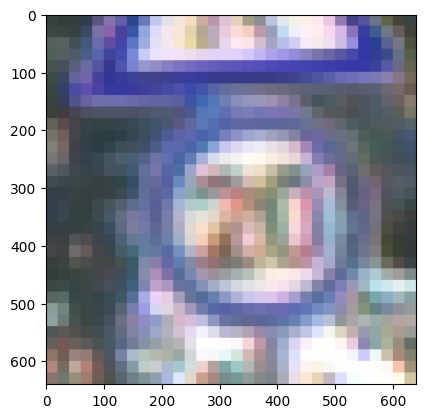

In [21]:
img=plt.imread(images_path_names[20])
plt.imshow(img)

In [96]:
preprocessed_images=[]
for image_file in images_path_names:
    img= cv2.imread(image_file)
    img= cv2.resize(img,(96,96))
    img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img= img.astype('float32')/255
    
    preprocessed_images.append(img)
    

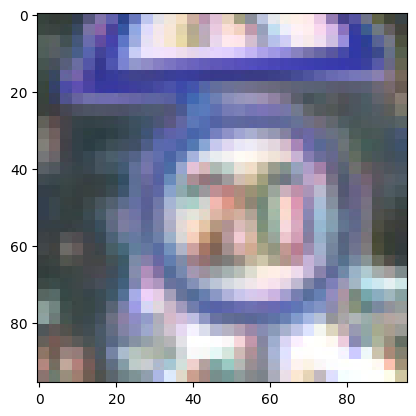

In [97]:
plt.imshow(preprocessed_images[20])

In [98]:
X= np.array(preprocessed_images)

In [99]:
X.shape

(2226, 96, 96, 3)

In [100]:
y.shape

(2226,)

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=10)

In [127]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D

# Define input shape
input_shape = (96, 96, 3)  # Assuming 3 channels and input size of 224x224

# Create a Sequential model
model = Sequential()

# Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(1024, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(2048, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2), padding='same'))

# Output layer - You might want to adjust this based on your task
model.add(Flatten())  # Flatten the output from previous layer
model.add(Dense(9, activation='softmax'))  # Assuming 10 classes, change as per your requirement


# Summary of the model
model.summary()


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_58 (Conv2D)              │ (None, 94, 94, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_58 (MaxPooling2D) │ (None, 47, 47, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_59 (Conv2D)              │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_59 (MaxPooling2D) │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_60 (Conv2D)              │ (None, 21, 21, 512)    │       295,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_60 (MaxPooling2D) │ (None, 11, 11, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_61 (Conv2D)              │ (None, 9, 9, 1024)     │     4,719,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_61 (MaxPooling2D) │ (None, 5, 5, 1024)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_62 (Conv2D)              │ (None, 3, 3, 2048)     │    18,876,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_62 (MaxPooling2D) │ (None, 2, 2, 2048)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 9)              │        73,737 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,984,585 (91.49 MB)

 Trainable params: 23,984,585 (91.49 MB)

 Non-trainable params: 0 (0.00 B)

In [128]:
from keras import optimizers
lr_schedule= optimizers.schedules.ExponentialDecay(initial_learning_rate=0.0001,
                                                 decay_steps=10000,
                                                 decay_rate=2)

model.compile(optimizer=optimizers.Adam(learning_rate=lr_schedule),loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [129]:
from keras.callbacks import ModelCheckpoint

# Monitor validation loss
checkpoint_loss = ModelCheckpoint('checkpoint_loss.keras',
                                  monitor='val_loss',
                                  verbose=1,
                                  save_best_only=True)

# Monitor validation accuracy
checkpoint_accuracy = ModelCheckpoint('checkpoint_accuracy.keras',
                                      monitor='val_accuracy',
                                      verbose=1,
                                      save_best_only=True)

In [130]:
history= model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test),callbacks=[checkpoint_accuracy,checkpoint_loss])

Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.1756 - loss: 2.0874
Epoch 1: val_accuracy improved from -inf to 0.38565, saving model to checkpoint_accuracy.keras

Epoch 1: val_loss improved from inf to 1.70739, saving model to checkpoint_loss.keras
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 188ms/step - accuracy: 0.1767 - loss: 2.0853 - val_accuracy: 0.3857 - val_loss: 1.7074
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.3772 - loss: 1.6394
Epoch 2: val_accuracy improved from 0.38565 to 0.45740, saving model to checkpoint_accuracy.keras

Epoch 2: val_loss improved from 1.70739 to 1.41832, saving model to checkpoint_loss.keras
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - accuracy: 0.3776 - loss: 1.6385 - val_accuracy: 0.4574 - val_loss: 1.4183
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4996 - loss: 1.3713
Epoch 3: val_accuracy improved from 0.45740 to 0.51121, saving model to checkpoint_accuracy.keras

Epoch 3: val_loss improved from 1.41832 

In [131]:
os.rename('checkpoint_loss.keras', 'checkpoint_loss.weights.h5')
os.rename('checkpoint_accuracy.keras', 'checkpoint_accuracy.weights.h5')

In [132]:
model.save_weights('checkpoint_loss.weights.h5')
model.save_weights('checkpoint_accuracy.weights.h5')

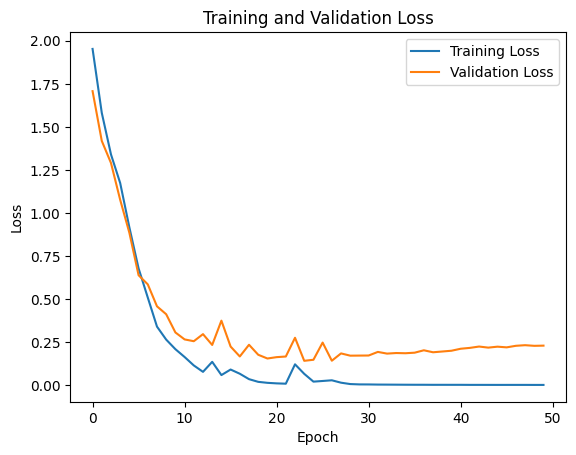

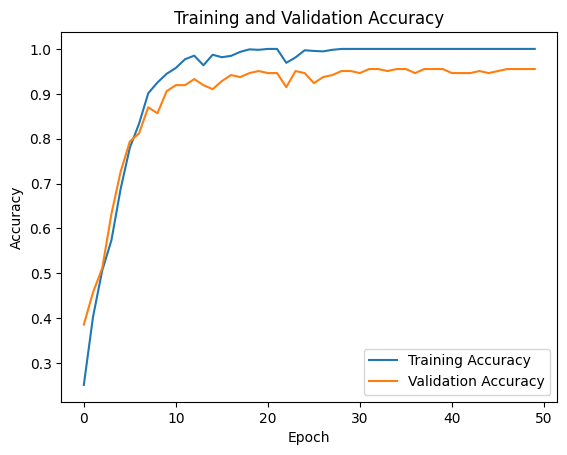

In [133]:
import matplotlib.pyplot as plt

# Extract the training and validation metrics from history.history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot training and validation loss
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [134]:
model.evaluate(X_test,y_test,callbacks=checkpoint)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9692 - loss: 0.1499


[0.22870305180549622, 0.9551569223403931]

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step


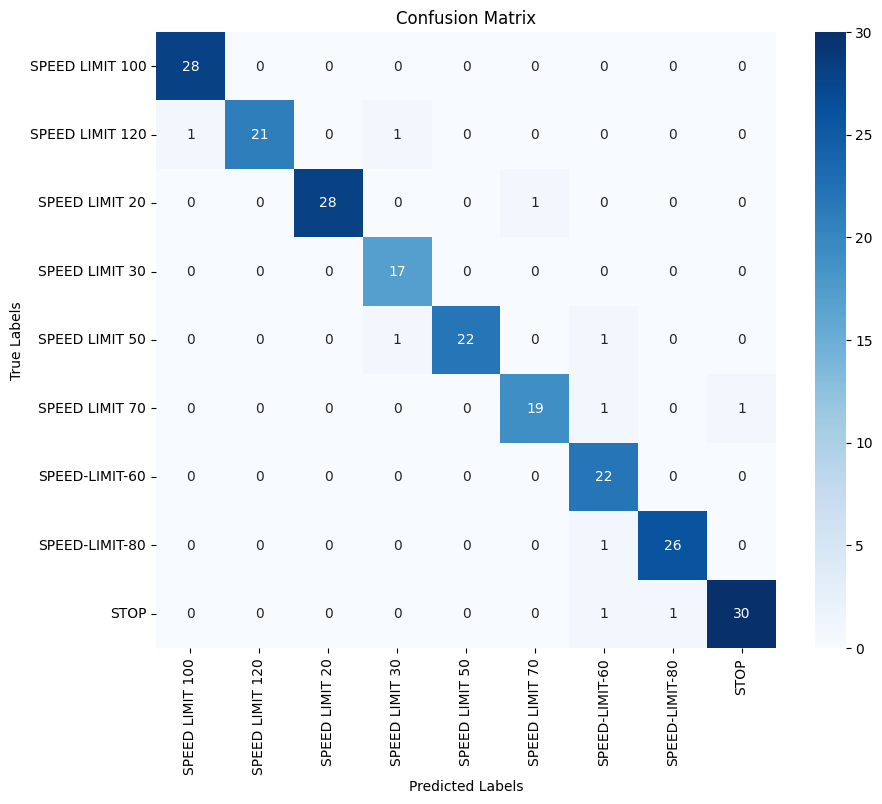

In [135]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [136]:
# Assuming you have y_pred_classes as a list of predicted class indices

# Create a list to store the main class labels corresponding to the predicted class indices
predicted_main_class_labels = [label_mapping[index] for index in y_pred_classes]

# Now predicted_main_class_labels contains the main class labels corresponding to the predicted class indices


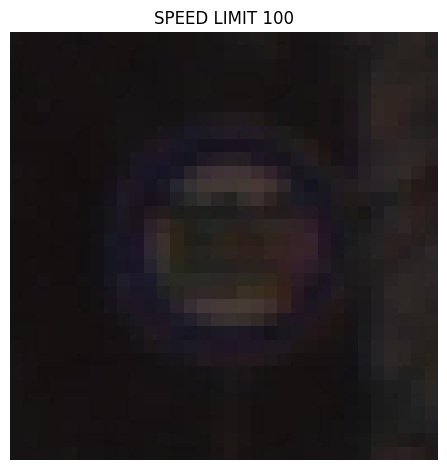

In [137]:
i= 2
plt.imshow(X_test[i])
plt.title(predicted_main_class_labels[i])
plt.axis('off')
plt.tight_layout()
plt.show()

In [138]:
model.save('Road_Sign2.h5',overwrite=False)

In [164]:
test_images_dir= '/kaggle/input/road-sign-recognition/dataset/test/images'
test_labels_dir= '/kaggle/input/road-sign-recognition/dataset/test/labels'

In [165]:
labels_file_name=os.listdir(path= test_labels_dir)



In [167]:
labels_file_name.sort()

In [168]:
labels_file_name[:5]

['0_10001_1577671998-65016_png.rf.59529f16da80c77f1f2a988cfd19d21f.txt',
 '0_10003_1577671998-651159_png.rf.925cb00ad4b239aaa3259698d86731b0.txt',
 '0_10008_1577671998-6551478_png.rf.7d64bc935cccf8a2ae82e56c492ee34c.txt',
 '0_10020_1577671998-6641226_png.rf.630be831470608811f8e8d89573a10b2.txt',
 '0_10027_1577671998-6681118_png.rf.da0db9cf0e75625fcf56649d137d6333.txt']

In [169]:
labels=[]
for label in labels_file_name:
    sp=label.split('_')[0] or label.split('-')[0]
    labels.append(sp)

In [170]:
labelss= []
for label in labels:
    sp=label.split('-')[0] 
    labelss.append(sp)

In [171]:
labels= labelss

In [176]:
 labels=np.array(labels, dtype='object')
    

In [177]:
labels[labels=='Screenshot']='14'

In [178]:
encoder= LabelEncoder()
labels=encoder.fit_transform(labels)

In [179]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [180]:
test_labels= labels

In [181]:
test_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 2, 2, 2, 2])

In [184]:
images_path_names= glob.glob(os.path.join(test_images_dir,'*'))

In [185]:
images_path_names.sort()

In [186]:
images_path_names[:10]

['/kaggle/input/road-sign-recognition/dataset/test/images/0_10001_1577671998-65016_png.rf.59529f16da80c77f1f2a988cfd19d21f.jpg',
 '/kaggle/input/road-sign-recognition/dataset/test/images/0_10003_1577671998-651159_png.rf.925cb00ad4b239aaa3259698d86731b0.jpg',
 '/kaggle/input/road-sign-recognition/dataset/test/images/0_10008_1577671998-6551478_png.rf.7d64bc935cccf8a2ae82e56c492ee34c.jpg',
 '/kaggle/input/road-sign-recognition/dataset/test/images/0_10020_1577671998-6641226_png.rf.630be831470608811f8e8d89573a10b2.jpg',
 '/kaggle/input/road-sign-recognition/dataset/test/images/0_10027_1577671998-6681118_png.rf.da0db9cf0e75625fcf56649d137d6333.jpg',
 '/kaggle/input/road-sign-recognition/dataset/test/images/0_10029_1577671998-67011_png.rf.a4c3742fc0bb1d890258f26df648096f.jpg',
 '/kaggle/input/road-sign-recognition/dataset/test/images/0_10037_1577671998-6750946_png.rf.5f1740df3939121ff800dc1642bba7ce.jpg',
 '/kaggle/input/road-sign-recognition/dataset/test/images/0_10060_1577671998-6930456_png

In [188]:
preprocessed_images=[]
for image_file in images_path_names:
    img= cv2.imread(image_file)
    img= cv2.resize(img,(96,96))
    img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img= img.astype('float32')/255
    
    preprocessed_images.append(img)
    

In [189]:
test_images= np.array(preprocessed_images)

In [191]:
model.evaluate(test_images,test_labels,verbose=1)

1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 1.0000 - loss: 0.0063

2024-03-06 15:56:50.590817: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 44180: 7.15656, expected 6.24082
2024-03-06 15:56:50.590876: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 44181: 8.03765, expected 7.12192
2024-03-06 15:56:50.590886: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 44182: 7.32376, expected 6.40803
2024-03-06 15:56:50.590894: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 44183: 6.00329, expected 5.08755
2024-03-06 15:56:50.590902: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 44184: 6.93475, expected 6.01901
2024-03-06 15:56:50.590911: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 44185: 7.6303, expected 6.71456
2024-03-06 15:56:50.590919: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 44186: 7.59534, expected 6.6796
2024-03-06 15:56:50.590927: E

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 342ms/step - accuracy: 0.9808 - loss: 0.0473


[0.08953959494829178, 0.9764150977134705]

In [196]:
predictions= model.predict(test_images)
predicted_labels= np.argmax(predictions,axis=1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [197]:
predicted_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 6, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 7, 7, 4, 7, 7, 7, 7, 7, 7, 7, 6, 1, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 2, 2, 2, 2])

In [207]:
predicted_labels = [label_mapping[index] for index in predicted_labels]

In [209]:
test_labels = [label_mapping[index] for index in test_labels]

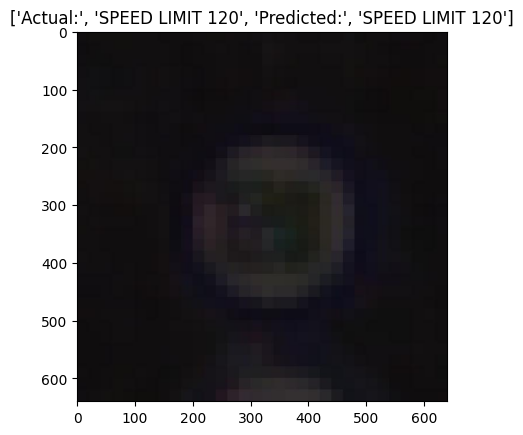

In [212]:
i= 202

img=plt.imread(images_path_names[i])
plt.title(['Actual:',test_labels[i],'Predicted:',predicted_labels[i]])
plt.imshow(img)